In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

### Contrôle de l'intégrité des données

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
data.shape

(5110, 12)

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
mean_bmi = data['bmi'].mean()

# Impute NaN values with the mean
data['bmi'].fillna(mean_bmi, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_356\520949281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(mean_bmi, inplace=True)


In [10]:
data.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [11]:
data.isnull().sum()/data.shape[0]*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [12]:
# df.dropna(inplace=True)
data.drop(columns=['id'], inplace=True)

In [13]:
data.duplicated().sum()

0

In [14]:
# identifiant les valeurs inutiles (peut etre just dans les valeurs de type object)
for i in data.select_dtypes(include='object').columns:
    print(data[i].value_counts())
    print('***'*10)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
******************************
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
******************************
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
******************************
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
******************************
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
******************************


### l'analyse exploratoire des données 

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [16]:
data.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


<Axes: title={'center': 'Stroke Vs Non Stroke'}, xlabel='stroke', ylabel='count'>

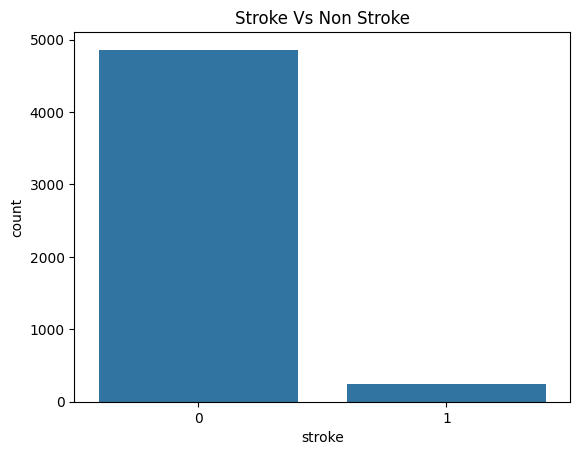

In [17]:
plt.title('Stroke Vs Non Stroke')
sns.countplot(x='stroke', data=data)
# we see that the data is inbalanced

In [18]:
df_final = data.copy()

### Balancing data method :

In [19]:
from sklearn.utils import resample

df_maj = data[data['stroke'] == 0]
df_min = data[data['stroke'] == 1]

df_min_upsampled = resample(df_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=4700,    # to match average class
                                 random_state=42) # reproducible results
df_min_upsampled.duplicated().sum()   # this method lead to overfitting on the duplicated data 

4451

In [20]:
df_final=pd.concat([df_maj,df_min_upsampled],axis=0)
df_final.shape

(9561, 11)

In [21]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
74,Female,52.0,0,0,Yes,Private,Rural,96.59,26.4,never smoked,1
44,Male,60.0,1,0,Yes,Govt_job,Urban,213.03,20.2,smokes,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
153,Male,68.0,0,0,Yes,Self-employed,Urban,77.82,27.5,smokes,1


### Encoding Categorical Data

In [22]:
from sklearn.preprocessing import LabelEncoder 

encoder=LabelEncoder()
 
df_final["gender"]=encoder.fit_transform(df_final["gender"])
df_final["ever_married"]=encoder.fit_transform(df_final["ever_married"])
df_final["Residence_type"]=encoder.fit_transform(df_final["Residence_type"])
df_final["work_type"]=encoder.fit_transform(df_final["work_type"])
df_final["smoking_status"]=encoder.fit_transform(df_final["smoking_status"])

In [23]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,1,14.0,0,0,0,1,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74,0,52.0,0,0,1,2,0,96.59,26.4,2,1
44,1,60.0,1,0,1,0,1,213.03,20.2,3,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
153,1,68.0,0,0,1,3,1,77.82,27.5,3,1


<Axes: >

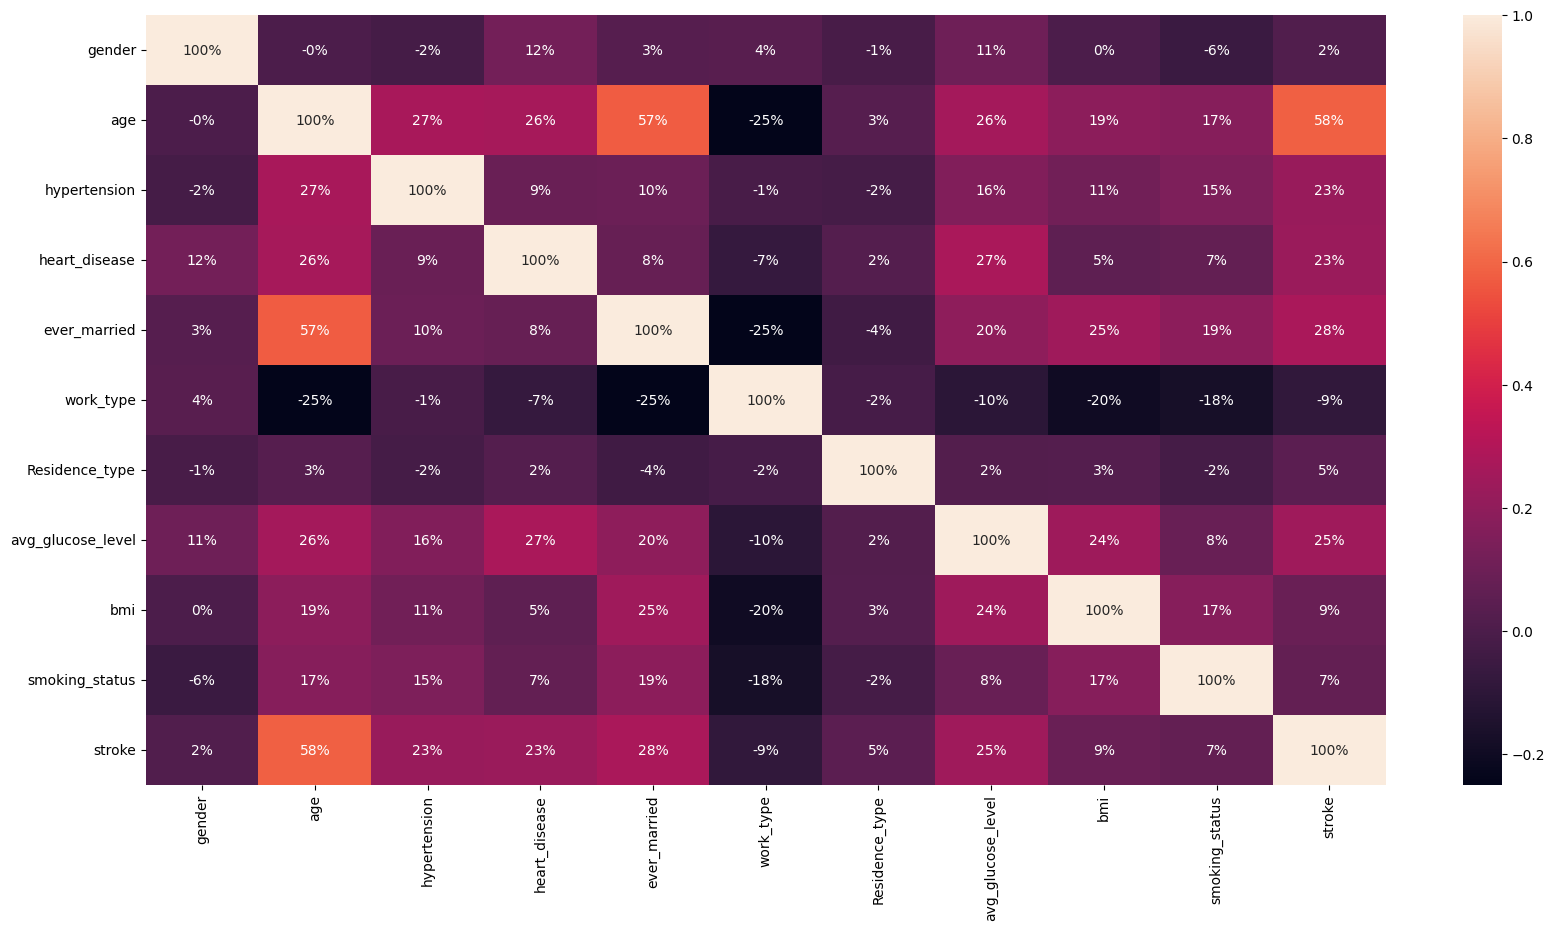

In [24]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df_final.corr(), annot=True, fmt='.0%')

### Scaling numerical data

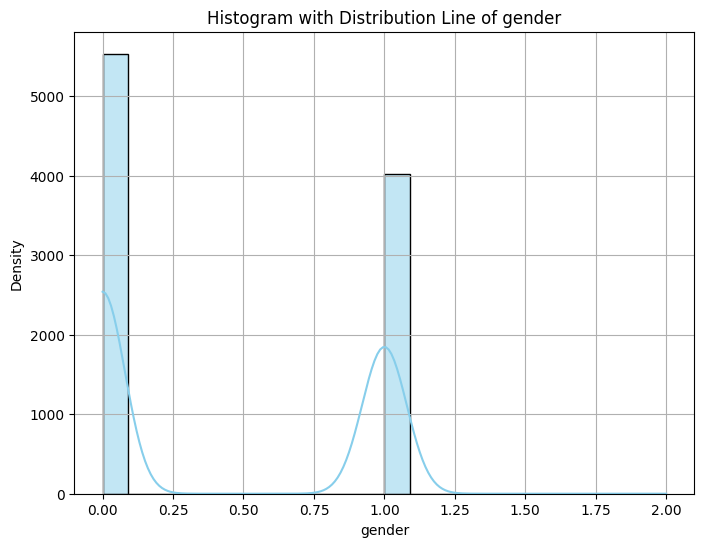

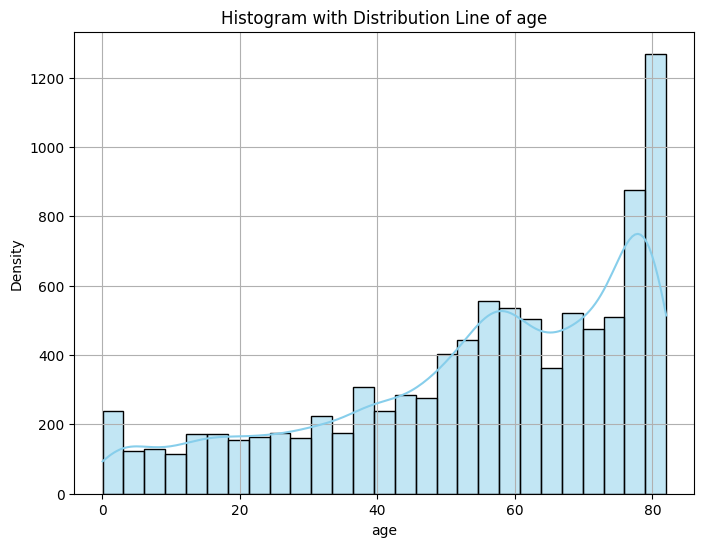

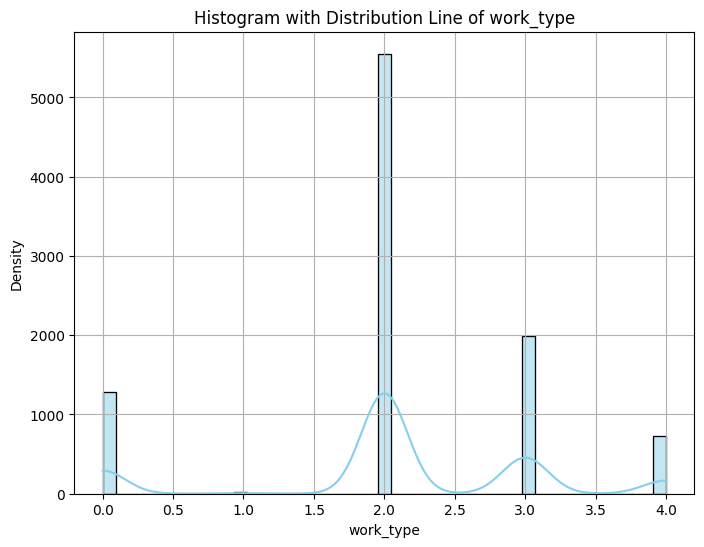

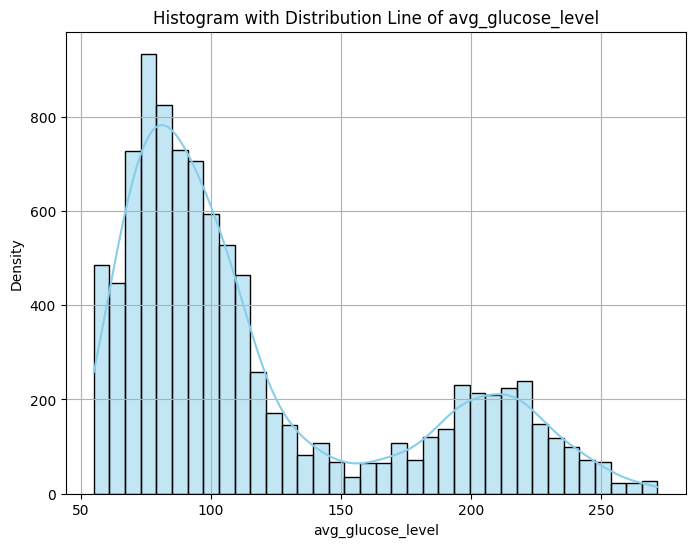

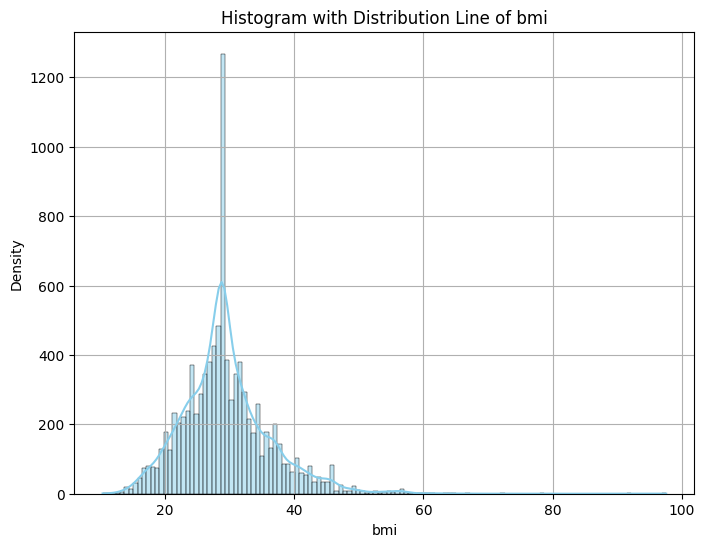

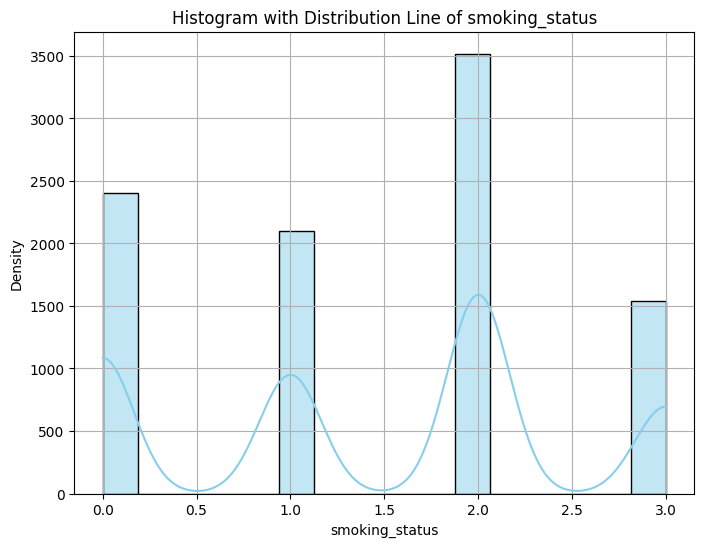

In [25]:

import matplotlib.pyplot as plt

numerical_cols = df_final.select_dtypes(include=['int', 'float'])
for column in df_final.columns:
    if df_final[column].nunique() == 2 and all(val in [0, 1] for val in df_final[column].unique()):
        numerical_cols.drop(column, axis=1, inplace=True)

# Plot histograms with distribution line for each remaining numerical column
for column in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_final[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with Distribution Line of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWar

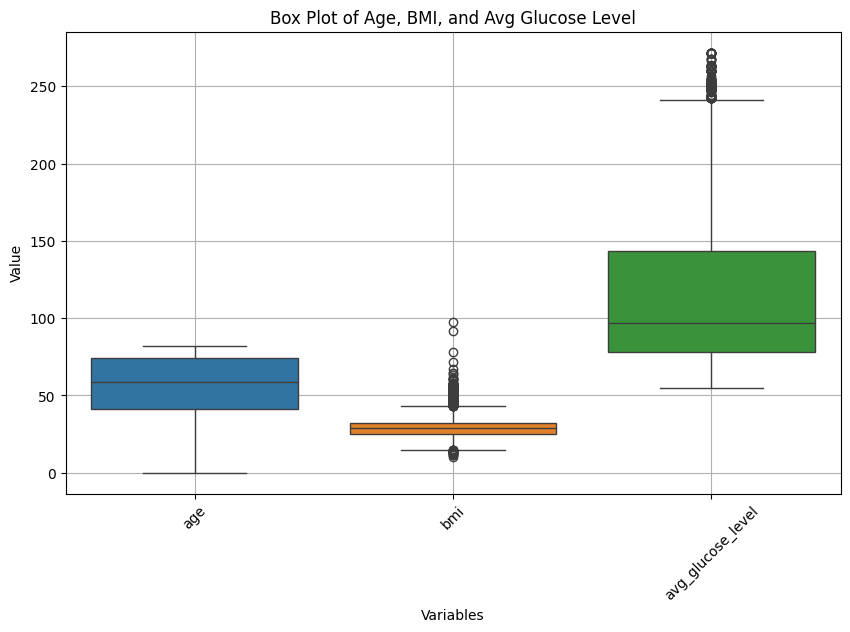

In [26]:
import seaborn as sns


# Assuming 'df' is your DataFrame containing age, BMI, and avg_glucose_level columns
# Replace 'df' with your actual DataFrame name

# Selecting the columns of interest
columns_of_interest = ['age', 'bmi', 'avg_glucose_level']

# Creating box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[columns_of_interest])
plt.title('Box Plot of Age, BMI, and Avg Glucose Level')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["age", "avg_glucose_level", "bmi"]

scaler = MinMaxScaler(feature_range=(0, 1))  # Set the desired range to (0, 1)

df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

In [28]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,0.035645,0,0,0,4,0,0.184655,0.088202,0,0
250,1,0.707031,1,0,1,2,1,0.151602,0.331042,2,0
251,0,0.096680,0,0,0,2,1,0.257455,0.083620,0,0
252,0,0.853516,0,0,1,2,0,0.064260,0.293242,1,0
253,1,0.169922,0,0,0,1,0,0.490075,0.100802,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74,0,0.633789,0,0,1,2,0,0.191441,0.184422,2,1
44,1,0.731445,1,0,1,0,1,0.728972,0.113402,3,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
153,1,0.829102,0,0,1,3,1,0.104792,0.197022,3,1


In [29]:
inputs=df_final.drop(["stroke"],axis=1)
target=df_final["stroke"]

In [30]:
inputs.shape, target.shape

((9561, 10), (9561,))

In [31]:
# def my_train_test_split(inputs, target, test_ratio=0.2, random_state=1):
    
#     if random_state is not None:
#         np.random.seed(random_state)
#     # Shuffle indices
#     indices = np.arange(len(inputs))
#     np.random.shuffle(indices)
    
#     # Calculate the number of samples for testing
#     test_size = int(len(inputs) * test_ratio)
    
#     # Split the indices into training and testing indices
#     test_indices = indices[:test_size]
#     train_indices = indices[test_size:]
    
#     # Split the data based on the indices
#     X_train, X_test = inputs.iloc[train_indices], inputs.iloc[test_indices]
#     y_train, y_test = target.iloc[train_indices], target.iloc[test_indices]
    
#     return X_train, X_test, y_train, y_test



In [32]:
# X_train, X_test, y_train, y_test = my_train_test_split(inputs, target)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1, stratify=1)


InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got 1 instead.

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7648, 10)
X_test shape: (1913, 10)
y_train shape: (7648,)
y_test shape: (1913,)


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') >= 0.98:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True  

In [33]:

callback = myCallback()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, input_shape=[10], activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=300, batch_size=10, validation_data=(X_test, y_test), callbacks=[callback])

NameError: name 'myCallback' is not defined

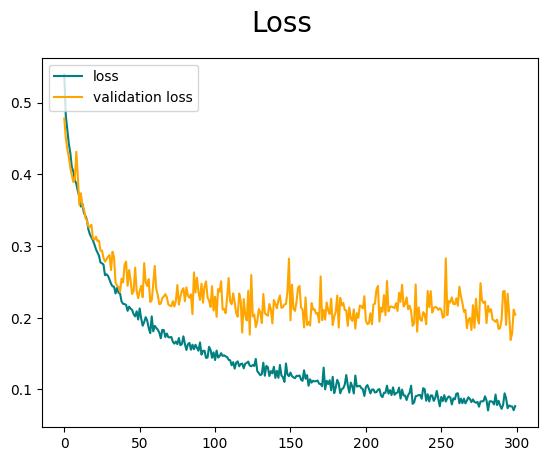

In [36]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='validation loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

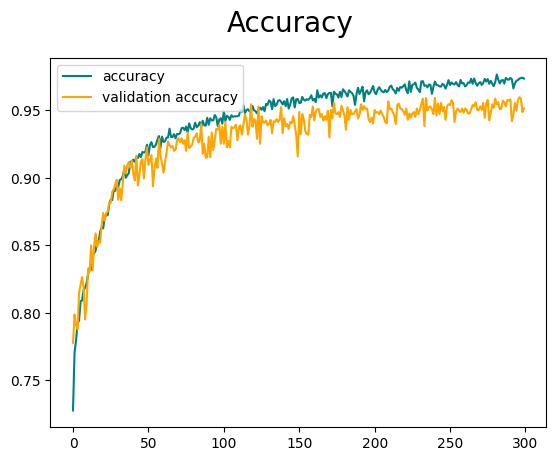

In [37]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='validation accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [38]:
y_pred = model.predict(X_test)

# Convert predictions to class labels (assuming binary classification)
y_pred = (y_pred > 0.5).astype(int)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score



# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Get the number of classes
num_classes = len(np.unique(y_test))

# Print the metrics for each class
print("Precision for each class:")
for i in range(num_classes):
    print(f"Class {i}: {precision[i]:.4f}")

print("\nRecall for each class:")
for i in range(num_classes):
    print(f"Class {i}: {recall[i]:.4f}")

print("\nF1-score for each class:")
for i in range(num_classes):
    print(f"Class {i}: {f1[i]:.4f}")

Precision for each class:
Class 0: 1.0000
Class 1: 0.9081

Recall for each class:
Class 0: 0.9064
Class 1: 1.0000

F1-score for each class:
Class 0: 0.9509
Class 1: 0.9518


AUC-ROC: 0.95


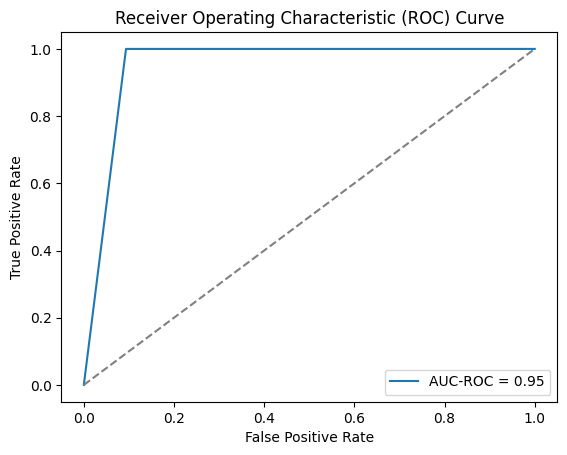

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)


roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()